In [47]:
#모듈 준비 (추가가능)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'BM YEONSUNG'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams['axes.unicode_minus'] = False

In [48]:
D=pd.read_excel('https://data.hossam.kr/D01/covid19.xlsx')
Data=pd.DataFrame(D)
Data.rename(columns={"서울시 기준일":"Time"},inplace=True)
Data.sort_values("Time",inplace=True)
Data["reindex"]=range(len(Data))
Data.set_index("reindex",drop=True,inplace=True)
Data.index.rename(None,inplace=True)

In [49]:
Data

,Time,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
0,2020-02-05,8,0.0,0,18.0,0.0,0
1,2020-02-06,11,0.0,0,24.0,0.0,0
2,2020-02-07,10,0.0,0,24.0,0.0,0
3,2020-02-08,10,0.0,0,24.0,0.0,0
4,2020-02-09,10,0.0,0,27.0,0.0,0
...,...,...,...,...,...,...,...
1207,2023-05-27,6191196,4078.0,6485,31647238.0,17796.0,34784
1208,2023-05-28,6194964,1393.0,6485,31665571.0,6868.0,34760
1209,2023-05-29,6194964,1393.0,6485,31665571.0,6868.0,34760
1210,2023-05-30,6198290,3326.0,6486,31679100.0,13529.0,34767


컬럼명 추출

In [50]:
col1=[]
for col in Data.columns:
    if col.find("서울")>=0:
        col1.append(col)
col1.append("Time")
col2=list(Data.columns.difference(col1))
col2.append("Time")

step1.

In [51]:
#날짜를 받아 1주일간의 기간을 정해주기
def date():
    i=input("날짜를 8자리(YYYYMMDD)로 입력하세요 :").strip()
    date="".join(str(pd.to_datetime(i)).split(" ")[0])
    return date

step2

In [52]:
'''
idx=Data[Data["Time"]==date()].index
pre_Data=Data.loc[idx[0]:idx[0]+6]
'''

'\nidx=Data[Data["Time"]==date()].index\npre_Data=Data.loc[idx[0]:idx[0]+6]\n'

step3

In [53]:
'''
Data1=pre_Data[col1]
Data2=pre_Data[col2]
'''

'\nData1=pre_Data[col1]\nData2=pre_Data[col2]\n'

step4

In [66]:
def showplots(Data1,Data2):
    fig,ax=plt.subplots(2,1)
    fig.suptitle("test")

    ax_0=ax[0].twinx()
    ax_1=ax[1].twinx()

    sb.barplot(
        ax=ax[0],
        x=Data1.index,
        y=Data1["서울 확진자"],
        color="Blue"
    )
    sb.lineplot(
        ax=ax_0,
        x=ax[0].get_xticks(),
        y=Data1["서울시 일일 확진"],
        color="Red"
    )
    sb.barplot(
        ax=ax[1],
        x=Data2.index,
        y=Data2["전국 확진"],
        color="Blue"
    )
    sb.lineplot(
        ax=ax_1,
        x=ax[1].get_xticks(),
        y=Data2["전국 일일 확진"],
        color="Red"
    )
    #꾸미기
    ax[0].title.set_text("Seoul")
    ax[1].title.set_text("Korea")
    ax[0].set_xticklabels(Data1["Time"])
    ax[1].set_xticklabels(Data2["Time"])
    # 날짜를 더 이쁘게 바꾸자.
    xtick1=list(map(lambda x: f"{x.year}/{x.month}/{x.day}",Data1["Time"]))
    xtick2=list(map(lambda x: f"{x.year}/{x.month}/{x.day}",Data2["Time"]))
    ax[0].set_xticklabels(xtick1)
    ax[1].set_xticklabels(xtick2)
    # 구간
    # ax[0].set_xlim(min(Data1["서울 확진자"]),max(Data1["서울 확진자"]))
    plt.show()
    plt.close()

#### 최종

In [67]:
def result():
    idx=Data[Data["Time"]==date()].index
    pre_Data=Data.loc[idx[0]:idx[0]+6]
    Data1,Data2=pre_Data[col1],pre_Data[col2]
    showplots(Data1,Data2)

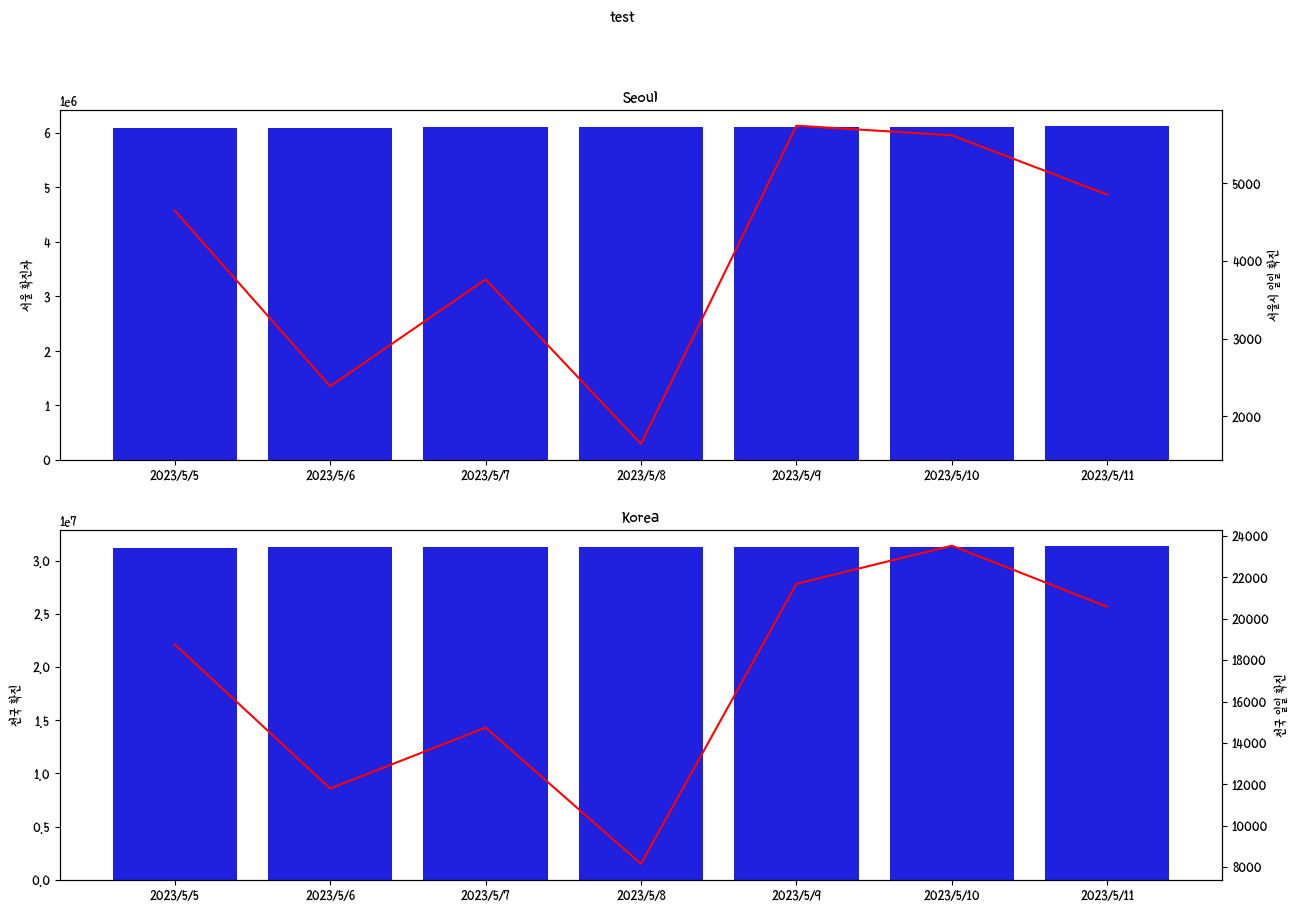

In [68]:
result()

In [28]:
Data1["서울 확진자"]

NameError: name 'Data1' is not defined